In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/RHM1983/Laptop_Price_Prediction/laptop_price.csv", encoding='latin-1')

In [3]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,127900.2043
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,85821.8018
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,54895.2500
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,242250.3515
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,172189.6920


In [4]:
data.shape

(1303, 13)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price             1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


In [8]:
data.corr()['Price']

laptop_ID    0.067830
Inches       0.068197
Ram          0.743007
Weight       0.210370
Price        1.000000
Name: Price, dtype: float64

In [9]:
data.drop(columns=['laptop_ID'], inplace=True)

In [10]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,127900.2043
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,85821.8018
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,54895.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,242250.3515
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,172189.6920


In [11]:
data.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,107278.397084
std,1.426304,5.084665,0.665475,66734.393291
min,10.100000,2.000000,0.690000,16611.780000
25%,14.000000,4.000000,1.500000,57186.530000
50%,15.600000,8.000000,2.040000,93274.190000
75%,15.600000,8.000000,2.300000,142047.903600
max,18.400000,64.000000,4.700000,582271.530000


G:\CSE_445\Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

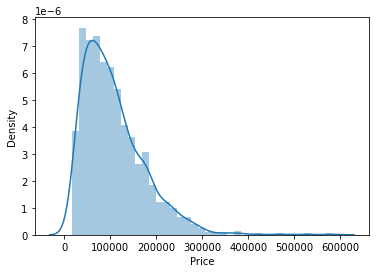

In [12]:
sns.distplot(data['Price'])

In [13]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [14]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [15]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,127900.2043,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,85821.8018,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,54895.2500,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,242250.3515,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,172189.6920,0


In [16]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [17]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,127900.2043,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,85821.8018,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,54895.2500,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,242250.3515,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,172189.6920,0,1


In [18]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [19]:
data.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1164,HP,250 G4,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,45538.2353,0,0,1366,768
460,Acer,Aspire E5-576G,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,51935.6800,0,0,Full HD 1920,1080
486,Dell,Precision 3520,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M620,Windows 10,2.17,223208.8600,0,1,IPS Panel Full HD 1920,1080
54,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,36660.4800,0,0,1366,768
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.40,283354.9600,0,1,IPS Panel 4K Ultra HD 3840,2160


In [20]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [21]:
data.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1268,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,19953.2300,0,0,1366,768
350,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,193557.7874,1,0,3840,2160
452,HP,ProBook 650,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,2.31,146450.9800,0,1,1920,1080
332,Asus,UX510UX-CN269T (i7-7500U/8GB/256GB,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.00,127356.9800,0,0,1920,1080
1256,Asus,Rog G752VT-GC073T,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,181393.0000,0,1,1920,1080


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   object 
 15  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory

In [23]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(2), int64(3), object(

In [25]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [26]:
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [27]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [28]:
data.drop(columns=['ScreenResolution'],inplace=True)

In [29]:
data.drop(columns=['X_res'],inplace=True)
data.drop(columns=['Y_res'],inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Cpu          1303 non-null   object 
 5   Ram          1303 non-null   int64  
 6   Memory       1303 non-null   object 
 7   Gpu          1303 non-null   object 
 8   OpSys        1303 non-null   object 
 9   Weight       1303 non-null   float64
 10  Price        1303 non-null   float64
 11  Touchscreen  1303 non-null   int64  
 12  Ips          1303 non-null   int64  
 13  ppi          1303 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 142.6+ KB


In [31]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [32]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [33]:
data.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,127900.2043,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,85821.8018,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,54895.2500,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,242250.3515,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,172189.6920,0,1,226.983005,Intel Core i5


In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [35]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)

In [36]:
data.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,127900.2043,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,85821.8018,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,54895.2500,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,242250.3515,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,172189.6920,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

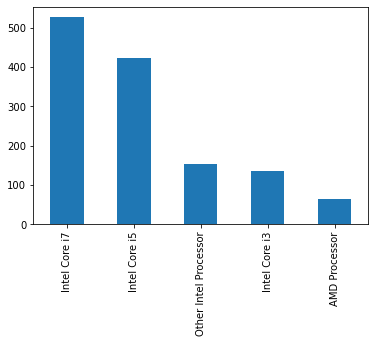

In [37]:
data['Cpu brand'].value_counts().plot(kind='bar')

In [38]:
data.drop(columns=['Cpu'],inplace=True)
data.drop(columns=['Cpu Name'],inplace=True)

In [39]:
data.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,127900.2043,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,85821.8018,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,54895.2500,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,242250.3515,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,172189.6920,0,1,226.983005,Intel Core i5


In [40]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
Name: Price, dtype: float64

In [41]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [42]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\RHM1983\AppData\Local\Temp/ipykernel_14292/2300112342.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
C:\Users\RHM1983\AppData\Local\Temp/ipykernel_14292/2300112342.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [43]:
data.sample(5)

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
913,HP,ProBook 450,Notebook,15.6,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.04,97282.9753,0,0,141.211998,Intel Core i7,0,256,0,0
530,Dell,Alienware 17,Gaming,17.3,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,287629.1519,0,1,127.335675,Intel Core i7,1000,128,0,0
638,Lenovo,Thinkpad Yoga,2 in 1 Convertible,13.3,8,256 SSD,Intel HD Graphics 620,Windows 10,1.37,167780.8874,1,1,165.632118,Intel Core i7,0,256,0,0
1076,Lenovo,Ideapad 700-15ISK,Notebook,15.6,4,1000 HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,93274.1900,0,1,141.211998,Intel Core i5,1000,0,0,0
1260,Lenovo,Yoga 500-14IBD,2 in 1 Convertible,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,79527.4647,1,0,157.350512,Intel Core i5,0,128,0,0


In [44]:
data.drop(columns=['Memory'],inplace=True)

In [45]:
data.sample(5)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
612,Dell,Vostro 3568,Notebook,15.6,4,Intel HD Graphics 520,Linux,2.18,42379.1330,0,0,100.454670,Intel Core i3,1000,0,0,0
553,HP,17-X047na (i3-6006U/8GB/1TB/W10),Notebook,17.3,8,Intel HD Graphics 520,Windows 10,2.65,51950.0005,0,0,106.113062,Intel Core i3,1000,0,0,0
147,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,15.6,4,Intel HD Graphics 500,Windows 10,2.00,32841.6800,0,0,141.211998,Other Intel Processor,1000,0,0,0
651,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,15.6,8,Nvidia GeForce GTX 1050,Linux,2.40,67688.2300,0,0,141.211998,Intel Core i5,1000,0,0,0
983,Fujitsu,LifeBook A556,Notebook,15.6,4,Intel HD Graphics 520,Windows 10,2.30,61960.0300,0,0,100.454670,Intel Core i5,0,256,0,0


In [46]:
data.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [47]:
data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [48]:
data.sample(5)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
1184,HP,Pavilion 15-BC000nv,Notebook,15.6,6,Nvidia GeForce GTX 960M,Windows 10,2.18,76280.53,0,1,141.211998,Intel Core i7,1000,0
829,Acer,Swift 3,Notebook,14.0,8,Intel HD Graphics 620,Windows 10,1.50,59095.93,0,1,157.350512,Intel Core i3,0,128
708,Lenovo,Thinkpad T460p,Notebook,14.0,8,Intel HD Graphics 520,Windows 10,1.80,113704.77,0,0,157.350512,Intel Core i5,0,256
983,Fujitsu,LifeBook A556,Notebook,15.6,4,Intel HD Graphics 520,Windows 10,2.30,61960.03,0,0,100.454670,Intel Core i5,0,256
1195,HP,Pavilion Power,Notebook,15.6,12,Nvidia GeForce GTX 1050,Windows 10,2.21,126688.69,0,1,141.211998,Intel Core i7,1000,128


In [49]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [50]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [51]:
data.sample(5)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
155,HP,15-BS103nv (i5-8250U/6GB/256GB/Radeon,Notebook,15.6,6,AMD Radeon 520,Windows 10,1.91,59095.9300,0,0,141.211998,Intel Core i5,0,256,AMD
1101,Dell,Latitude E5270,Ultrabook,12.5,4,Intel HD Graphics 520,Windows 7,1.50,111410.6259,0,0,125.367428,Intel Core i3,0,128,Intel
470,HP,Spectre x360,2 in 1 Convertible,13.3,8,Intel UHD Graphics 620,Windows 10,1.29,190844.5300,1,1,331.264236,Intel Core i7,0,512,Intel
1007,HP,EliteBook 1040,Ultrabook,14.0,8,Intel HD Graphics 520,Windows 7,1.43,138336.0300,0,0,157.350512,Intel Core i7,0,256,Intel
1269,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,4,Nvidia GeForce 920M,Windows 10,2.20,68768.9504,0,0,100.454670,Intel Core i7,500,0,Nvidia


In [52]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [53]:
data[data['Gpu brand']=='ARM']

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,4,ARM Mali T860 MP4,Chrome OS,1.15,62914.73,1,1,234.5074,AMD Processor,0,0,ARM


In [54]:
data = data[data['Gpu brand']!='ARM']

In [55]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [56]:
data.drop(columns=['Gpu'],inplace=True)

In [57]:
data.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,127900.2043,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,85821.8018,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,54895.2500,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,242250.3515,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,172189.6920,0,1,226.983005,Intel Core i5,0,256,Intel


In [58]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [59]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [60]:
data['os'] = data['OpSys'].apply(cat_os)

In [61]:
data.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,127900.2043,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,85821.8018,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,54895.2500,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,242250.3515,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,172189.6920,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [62]:
data.drop(columns=['OpSys'],inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   Product      1302 non-null   object 
 2   TypeName     1302 non-null   object 
 3   Inches       1302 non-null   float64
 4   Ram          1302 non-null   int64  
 5   Weight       1302 non-null   float64
 6   Price        1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   Ips          1302 non-null   int64  
 9   ppi          1302 non-null   float64
 10  Cpu brand    1302 non-null   object 
 11  HDD          1302 non-null   int64  
 12  SSD          1302 non-null   int64  
 13  Gpu brand    1302 non-null   object 
 14  os           1302 non-null   object 
dtypes: float64(4), int64(5), object(6)
memory usage: 162.8+ KB


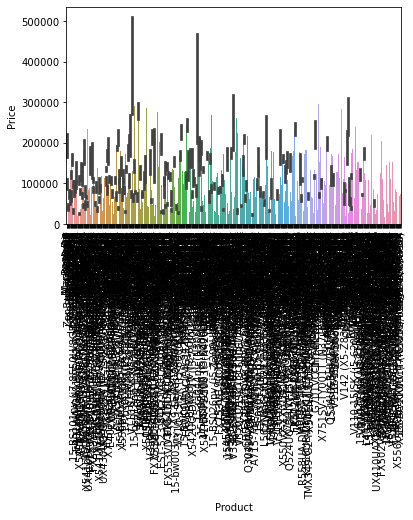

In [64]:
sns.barplot(x=data['Product'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
data.drop(columns=['Product'],inplace=True)

In [66]:
data.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,8,1.37,127900.2043,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,85821.8018,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,54895.2500,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,242250.3515,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,172189.6920,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


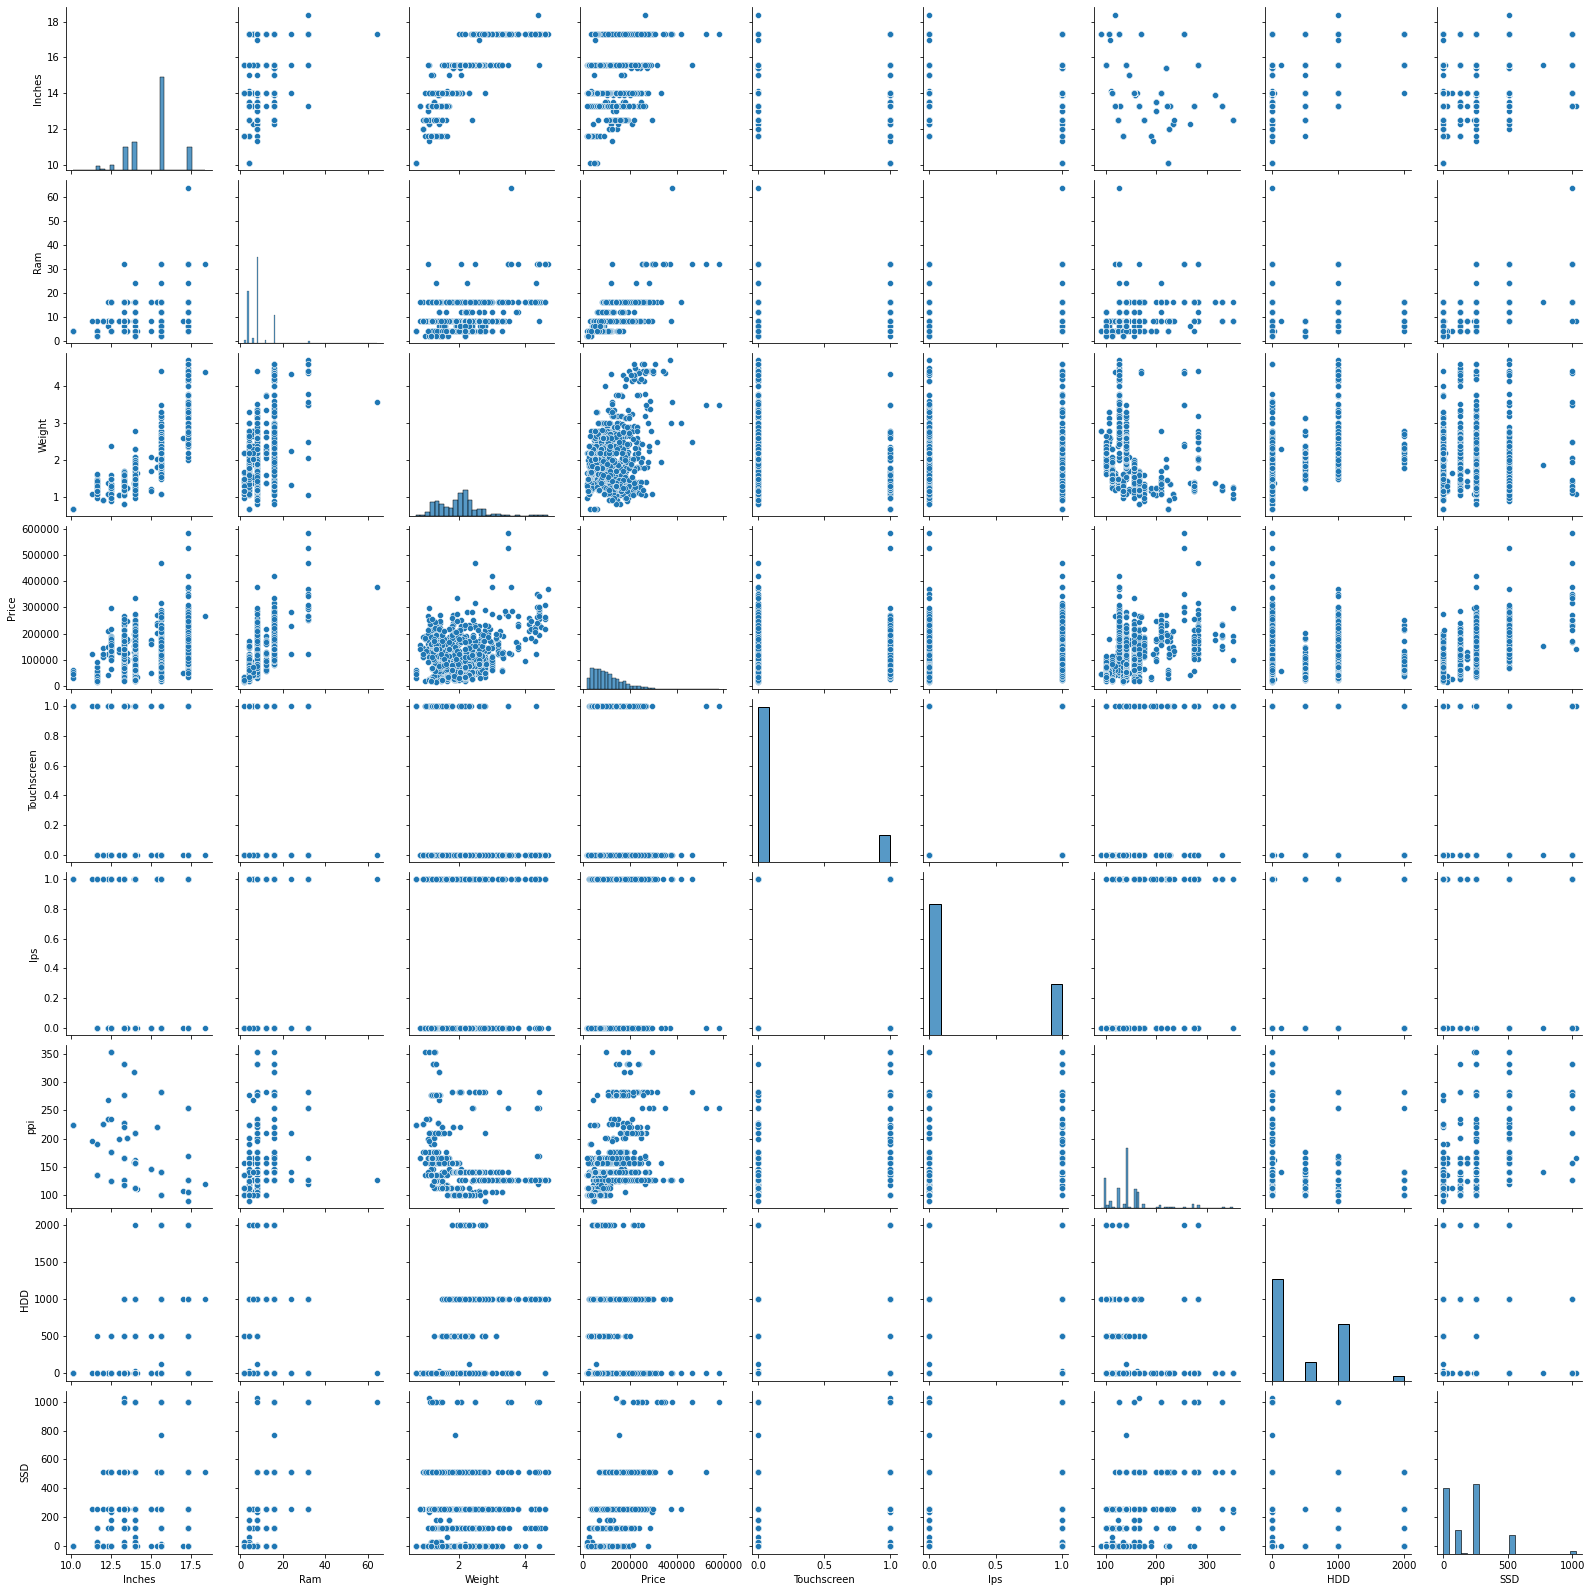

In [67]:
sns.pairplot(data)

(array([  4.,  34.,  49., 166., 210.,   4., 669.,   0., 165.,   1.]),
 array([10.1 , 10.93, 11.76, 12.59, 13.42, 14.25, 15.08, 15.91, 16.74,
        17.57, 18.4 ]),
 <BarContainer object of 10 artists>)

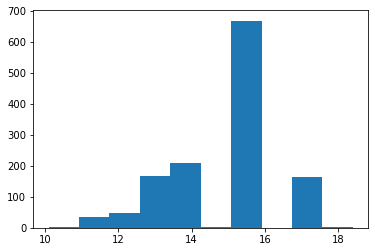

In [68]:
plt.hist(data['Inches'])


<AxesSubplot:xlabel='Inches', ylabel='Price'>

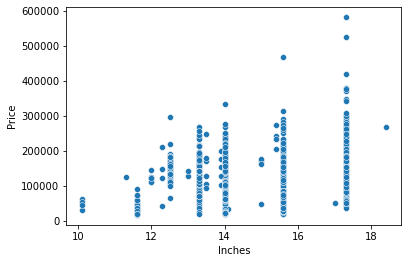

In [69]:
sns.scatterplot(x=data['Inches'],y=data['Price'])

<AxesSubplot:>

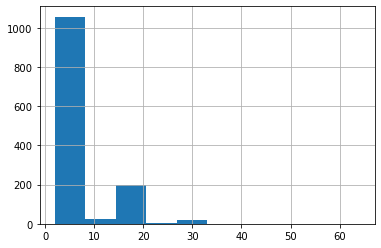

In [70]:
data['Ram'].hist()

<AxesSubplot:xlabel='Ram', ylabel='Price'>

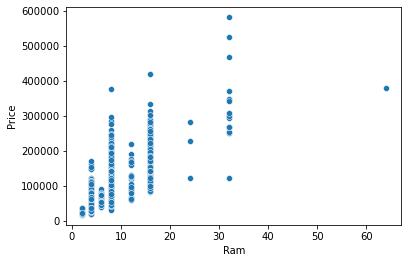

In [71]:
sns.scatterplot(x=data['Ram'],y=data['Price'])

<AxesSubplot:>

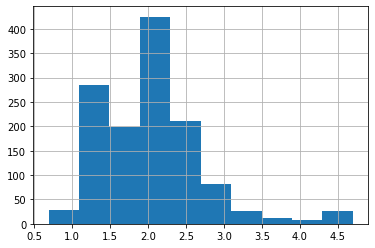

In [72]:
data['Weight'].hist()

<AxesSubplot:xlabel='Weight', ylabel='Price'>

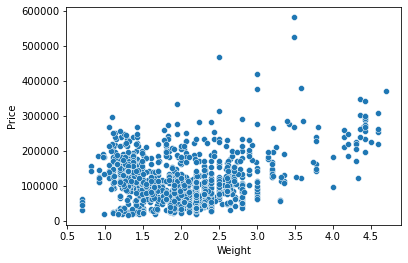

In [73]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

<AxesSubplot:>

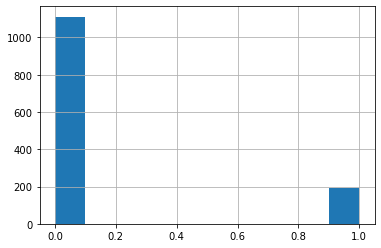

In [74]:
data['Touchscreen'].hist()

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

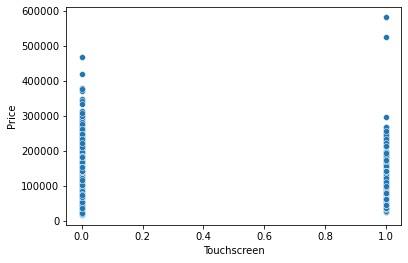

In [75]:
sns.scatterplot(x=data['Touchscreen'],y=data['Price'])

<AxesSubplot:>

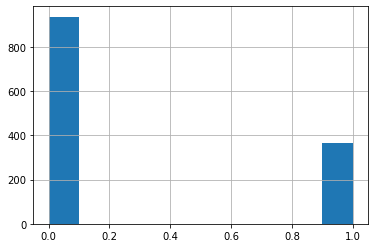

In [76]:
data['Ips'].hist()

<AxesSubplot:xlabel='Ips', ylabel='Price'>

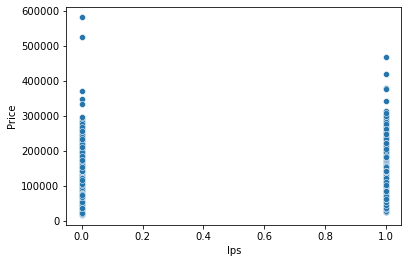

In [77]:
sns.scatterplot(x=data['Ips'],y=data['Price'])

<AxesSubplot:>

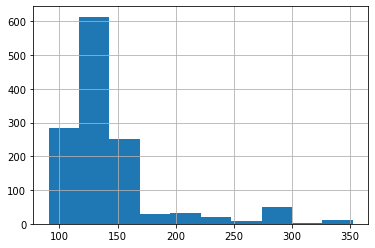

In [78]:
data['ppi'].hist()

<AxesSubplot:xlabel='ppi', ylabel='Price'>

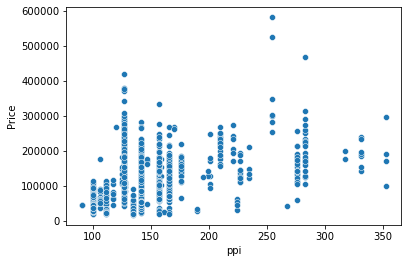

In [79]:
sns.scatterplot(x=data['ppi'],y=data['Price'])

<AxesSubplot:>

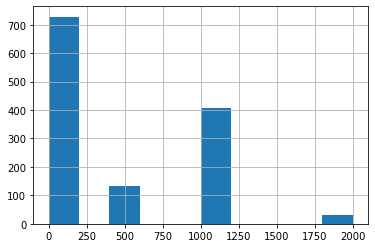

In [80]:
data['HDD'].hist()

<AxesSubplot:xlabel='HDD', ylabel='Price'>

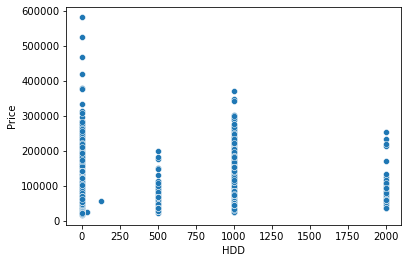

In [81]:
sns.scatterplot(x=data['HDD'],y=data['Price'])

<AxesSubplot:>

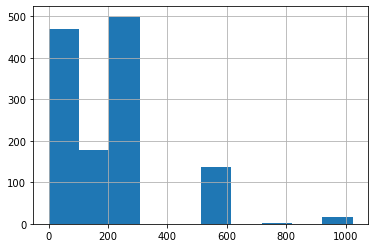

In [82]:
data['SSD'].hist()

<AxesSubplot:xlabel='SSD', ylabel='Price'>

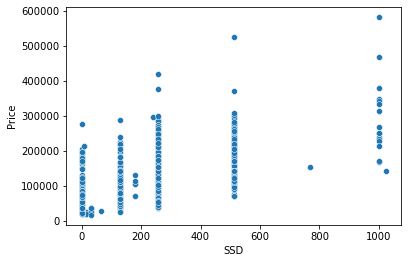

In [83]:
sns.scatterplot(x=data['SSD'],y=data['Price'])

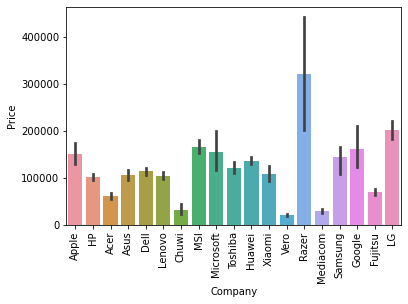

In [84]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

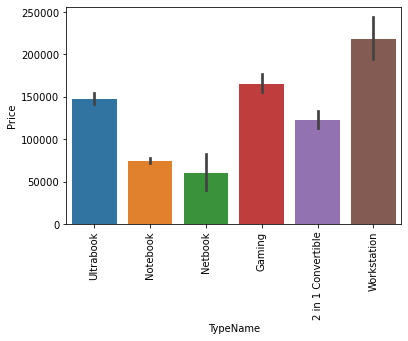

In [85]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

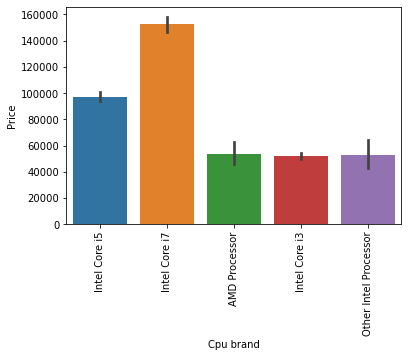

In [86]:
sns.barplot(x=data['Cpu brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

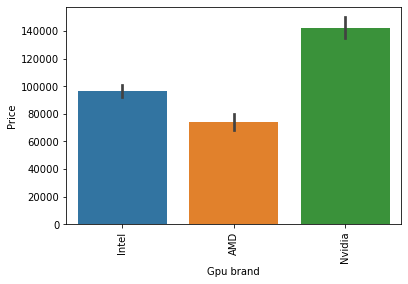

In [87]:
sns.barplot(x=data['Gpu brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

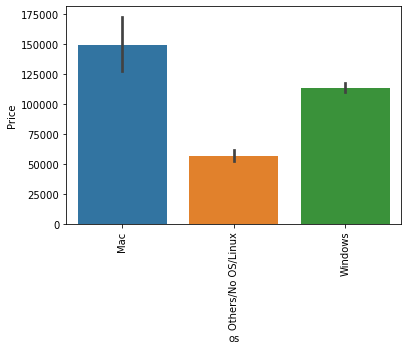

In [88]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

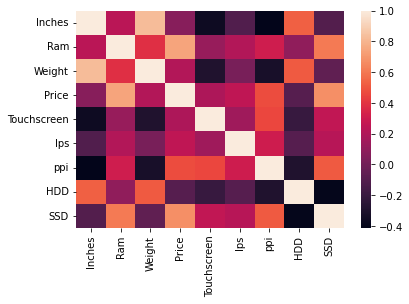

In [89]:
sns.heatmap(data.corr())

In [90]:
data.head(
)

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,8,1.37,127900.2043,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,85821.8018,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,54895.2500,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,242250.3515,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,172189.6920,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [91]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'])
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Inches                           1302 non-null   float64
 1   Ram                              1302 non-null   int64  
 2   Weight                           1302 non-null   float64
 3   Price                            1302 non-null   float64
 4   Touchscreen                      1302 non-null   int64  
 5   Ips                              1302 non-null   int64  
 6   ppi                              1302 non-null   float64
 7   HDD                              1302 non-null   int64  
 8   SSD                              1302 non-null   int64  
 9   Company_Acer                     1302 non-null   uint8  
 10  Company_Apple                    1302 non-null   uint8  
 11  Company_Asus                     1302 non-null   uint8  
 12  Company_Chuwi       

In [92]:
one_hot_encoded_data.corr()['Price']

Inches                             0.067329
Ram                                0.742905
Weight                             0.209867
Price                              1.000000
Touchscreen                        0.192917
Ips                                0.253320
ppi                                0.475368
HDD                               -0.096891
SSD                                0.670660
Company_Acer                      -0.208541
Company_Apple                      0.080636
Company_Asus                      -0.010568
Company_Chuwi                     -0.055680
Company_Dell                       0.048245
Company_Fujitsu                   -0.027164
Company_Google                     0.038068
Company_HP                        -0.041566
Company_Huawei                     0.016834
Company_LG                         0.067040
Company_Lenovo                    -0.029293
Company_MSI                        0.180027
Company_Mediacom                  -0.087213
Company_Microsoft               

In [93]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [94]:
X

,Company,TypeName,Inches,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [96]:
X_train

,Company,TypeName,Inches,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
610,Lenovo,Notebook,15.6,32,2.50,0,1,282.423996,Other Intel Processor,0,1000,Nvidia,Windows
462,Asus,Notebook,15.6,8,2.37,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows
739,Acer,Notebook,15.6,4,2.40,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
1134,Acer,Notebook,15.6,4,2.23,0,0,141.211998,Intel Core i5,1000,0,Nvidia,Windows
319,Acer,Notebook,11.6,4,1.40,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,15.6,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,15.6,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,15.6,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [97]:
X_test

,Company,TypeName,Inches,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
248,HP,Notebook,13.3,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,15.6,4,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel,Others/No OS/Linux
1251,HP,Notebook,15.6,4,1.86,0,0,100.454670,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,15.6,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Others/No OS/Linux
885,HP,2 in 1 Convertible,13.3,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Dell,Notebook,15.6,8,2.20,0,0,141.211998,Intel Core i7,0,256,AMD,Windows
468,HP,Gaming,17.3,12,3.78,0,1,127.335675,Intel Core i7,1000,0,Nvidia,Windows
75,Asus,Gaming,15.6,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
134,HP,Notebook,15.6,8,2.05,0,0,100.454670,Intel Core i7,1000,0,Intel,Windows


In [98]:
data.corr()['Price']

Inches         0.067329
Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [99]:
data.head(
)

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,8,1.37,127900.2043,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,85821.8018,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,54895.2500,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,242250.3515,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,172189.6920,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [100]:
data.drop(columns=['Inches'],inplace=True)

In [101]:
data.head(
)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,127900.2043,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,85821.8018,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,54895.2500,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,242250.3515,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,172189.6920,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


G:\CSE_445\Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

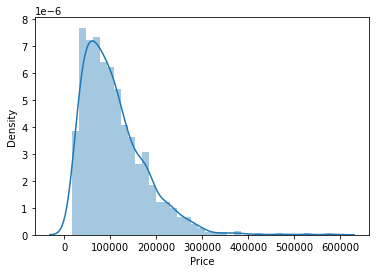

In [102]:
sns.distplot(data['Price'])

G:\CSE_445\Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

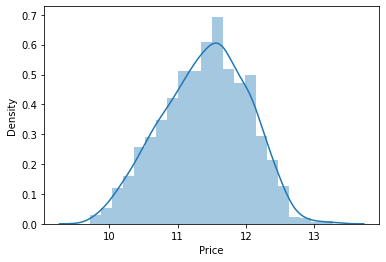

In [103]:
sns.distplot(np.log(data['Price'])) 

In [104]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])


In [105]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [107]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
610,Lenovo,Notebook,32,2.50,0,1,282.423996,Other Intel Processor,0,1000,Nvidia,Windows
462,Asus,Notebook,8,2.37,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows
739,Acer,Notebook,4,2.40,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
1134,Acer,Notebook,4,2.23,0,0,141.211998,Intel Core i5,1000,0,Nvidia,Windows
319,Acer,Notebook,4,1.40,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [108]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel,Others/No OS/Linux
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Others/No OS/Linux
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
16,Dell,Notebook,8,2.20,0,0,141.211998,Intel Core i7,0,256,AMD,Windows
468,HP,Gaming,12,3.78,0,1,127.335675,Intel Core i7,1000,0,Nvidia,Windows
75,Asus,Gaming,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
134,HP,Notebook,8,2.05,0,0,100.454670,Intel Core i7,1000,0,Intel,Windows


In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7769186776634661
MAE 0.2117551369767177
MSE 0.07595393034880564


In [111]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7356234932617391
MAE 0.20810715916959824
MSE 0.0900139669620824


In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7874365493365258
MAE 0.20722243684050037
MSE 0.07237284303900347


In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.86146954216293
MAE 0.16651191581103497
MSE 0.04716635456316642


In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7809168839313559
MAE 0.20496100459987338
MSE 0.07459263538600576


In [118]:
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,127900.2043,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,85821.8018,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,54895.2500,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,242250.3515,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,172189.6920,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,60909.8600,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,143109.5300,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,21862.6300,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,72939.0800,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [121]:
import pickle

pickle.dump(data, open('data.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))